***
***
***


<br><strong>Assignment 2 | Classification Modeling</strong><br>
<strong>Data Analysis and Code</strong><br>
Machine Learning | Cohort 3<br>
Linh Le<br>
<br>

***
***
***

<br>
The purpose of this model is to predict which customers will subscribe to Apprentice Chef's new service, <i>Halfway There</i>. <br><br>

***

<h3>Preparing Libraries, Dataset File, and User-Defined Functions</h3><br>

In this section, all the necessary libraries, files, and user-defined functions will be ran so that we have all the necessary tools for exploratory data analysis and model development.


In [1]:
# importing necessary libraries
import pandas as pd                                     # data science essentials
import seaborn as sns                                   # essential graphical output
import matplotlib.pyplot as plt                         # enhanced graphical output
import statsmodels.formula.api as smf                   # regression modeling
from sklearn.model_selection import train_test_split    # train/test split
import sklearn.linear_model                             # linear models (scikit-learn)
from sklearn.metrics import confusion_matrix            # confusion matrix
from sklearn.metrics import roc_auc_score               # auc score
from sklearn.neighbors import KNeighborsClassifier      # KNN for classification
from sklearn.neighbors import KNeighborsRegressor       # KNN for regression
from sklearn.preprocessing import StandardScaler        # standard scaler

# CART model packages
from sklearn.tree import DecisionTreeRegressor          # Regression trees     
from sklearn.tree import DecisionTreeClassifier         # Classification trees
from sklearn.tree import export_graphviz                # exports graphics
from sklearn.externals.six import StringIO              # save object in memory
from IPython.display import Image                       # displays an image on the frontend
import pydotplus

# Hyper parameter tuning and ensemble modeling
from sklearn.model_selection import GridSearchCV        # hyperparameter tuning
from sklearn.metrics import make_scorer                 # customizable scorer
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm
from sklearn.naive_bayes import GaussianNB              # Gaussian Naive Bayes



# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = "Apprentice_Chef_Dataset.xlsx"


# reading the file into Python
original_df = pd.read_excel(file)

//anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
//anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


<h4>User-Defined Functions</h4><br>

Here, all the user-defined functions that will be used in this Notebook is called.


In [2]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')
        

        
########################################
# optimal_neighbors function
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=802,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 802
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')
    
    
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

<h3>Flagging Missing Values</h3><br>

Since the same dataset was used, much of the initial data exploration was already done. However, missing values still need to be filled in; again, there was only one value missing, in the column "FAMILY_NAME". As this cannot be accurately imputed, it was imputed with "Unknown". <br>

Subsequently, they will be checked to make sure there are no missing values in the dataset.
<br>

In [3]:
# Looping over columns with missing values
for col in original_df:

    # creating columns with 1s if missing and 0 if not
    if original_df[col].isnull().astype(int).sum() > 0:
        original_df['m_'+col] = original_df[col].isnull().astype(int)


In [4]:
# Creating an imputation value (through soft-coding)
fill = "Unknown"

# Imputing 'FAMILY_NAME'
original_df['FAMILY_NAME'] = original_df['FAMILY_NAME'].fillna(fill)


In [5]:
# Making sure all missing values have been taken care of
original_df.isnull().any().sum()

0

Since a new response variable is predicted in this model, before any feature engineering, I ran a logistic regression base model to get an initial look at the correlation between the new response variable, CROSS_SELL_SUCCESS, and all the other variables in the dataset. 

In [6]:
# Base model before any feature engineering

# instantiating a logistic regression model object
logistic_base = smf.logit(formula   = """CROSS_SELL_SUCCESS ~
                                          REVENUE +
                                          TOTAL_MEALS_ORDERED +
                                          UNIQUE_MEALS_PURCH +
                                          CONTACTS_W_CUSTOMER_SERVICE +
                                          PRODUCT_CATEGORIES_VIEWED +
                                          AVG_TIME_PER_SITE_VISIT +
                                          MOBILE_NUMBER +
                                          CANCELLATIONS_BEFORE_NOON +
                                          CANCELLATIONS_AFTER_NOON +
                                          TASTES_AND_PREFERENCES +
                                          PC_LOGINS +
                                          MOBILE_LOGINS +
                                          WEEKLY_PLAN +
                                          EARLY_DELIVERIES +
                                          LATE_DELIVERIES +
                                          PACKAGE_LOCKER +
                                          REFRIGERATED_LOCKER +
                                          FOLLOWED_RECOMMENDATIONS_PCT +
                                          AVG_PREP_VID_TIME +
                                          LARGEST_ORDER_SIZE +
                                          MASTER_CLASSES_ATTENDED +
                                          MEDIAN_MEAL_RATING +
                                          AVG_CLICKS_PER_VISIT +
                                          TOTAL_PHOTOS_VIEWED""",
                                          data = original_df)

# FITTING the model object
results_logistic_base = logistic_base.fit()


# checking the results SUMMARY
results_logistic_base.summary()
                          
                    

Optimization terminated successfully.
         Current function value: 0.470803
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1946
Model:                          Logit   Df Residuals:                     1921
Method:                           MLE   Df Model:                           24
Date:                Sun, 15 Mar 2020   Pseudo R-squ.:                  0.2500
Time:                        19:05:26   Log-Likelihood:                -916.18
converged:                       True   LL-Null:                       -1221.6
Covariance Type:            nonrobust   LLR p-value:                1.280e-113
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -2.8342      1.258     -2.254      0.024      -5.299      -0.369
REVENUE                         -0.0001   8.49e-05     -1.498      0.134      -0.000    3.92e-05
TOTAL_MEALS_ORDERED              0.0010      0.001      0.749      0.454      -0.002       0.004
UNIQUE_MEALS_PURCH              -0.0090      0.024     -0.378      0.705      -0.056       0.038
CONTACTS_W_CUSTOMER_SERVICE      0.0096      0.026      0.370      0.711      -0.041       0.060
PRODUCT_CATEGORIES_VIEWED        0.0119      0.019      0.628      0.530      -0.025       0.049
AVG_TIME_PER_SITE_VISIT          0.0010      0.001      1.099      0.272      -0.001       0.003
MOBILE_NUMBER                    0.6968      0.170      4.090      0.000       0.363       1.031
CANCELLATIONS_BEFORE_NOON        0.2514      0.042      5.964      0.000       0.169       0.334
CANCELLATIONS_AFTER_NOON        -0.2554      0.131     -1.957      0.050      -0.511       0.000
TASTES_AND_PREFERENCES           0.4595      0.125      3.670      0.000       0.214       0.705
PC_LOGINS                        0.2065      0.099      2.089      0.037       0.013       0.400
MOBILE_LOGINS                   -0.2745      0.109     -2.527      0.011      -0.487      -0.062
WEEKLY_PLAN                      0.0021      0.004      0.502      0.615      -0.006       0.010
EARLY_DELIVERIES                 0.0345      0.025      1.365      0.172      -0.015       0.084
LATE_DELIVERIES                  0.0292      0.021      1.399      0.162      -0.012       0.070
PACKAGE_LOCKER                   0.0310      0.137      0.226      0.821      -0.237       0.299
REFRIGERATED_LOCKER              0.4157      0.221      1.880      0.060      -0.018       0.849
FOLLOWED_RECOMMENDATIONS_PCT     0.0561      0.003     17.178      0.000       0.050       0.063
AVG_PREP_VID_TIME                0.0021      0.002      0.861      0.389      -0.003       0.007
LARGEST_ORDER_SIZE              -0.0003      0.063     -0.004      0.997      -0.125       0.124
MASTER_CLASSES_ATTENDED          0.0123      0.106      0.116      0.908      -0.195       0.220
MEDIAN_MEAL_RATING               0.0172      0.157      0.110      0.913      -0.290       0.325
AVG_CLICKS_PER_VISIT            -0.0366      0.048     -0.765      0.444      -0.130       0.057
TOTAL_PHOTOS_VIEWED             -0.0002      0.000     -0.573      0.567      -0.001       0.001
================================================================================================
"""

<h3>Outlier Analysis</h3><br>

To maximize model accuracy, outliers need to be identified and defined to classify whether or not a data point deviates from the overall pattern. <br>
This outlier analysis will comprise three steps: <br>
1. Firstly a histogram will be created for every variable in the dataset.
2. Outlier thresholds (both lower and upper) will be identified and flagged based on these histograms.
3. From these thresholds, features (columns) for outliers will be created to be included in the predictive model (if significant).

In [7]:
# Creating a comprehensive list of variables

all_variables =['REVENUE',
                'CROSS_SELL_SUCCESS', 
                'TOTAL_MEALS_ORDERED', 
                'UNIQUE_MEALS_PURCH',
                'CONTACTS_W_CUSTOMER_SERVICE', 
                'PRODUCT_CATEGORIES_VIEWED',
                'AVG_TIME_PER_SITE_VISIT', 
                'MOBILE_NUMBER', 
                'CANCELLATIONS_BEFORE_NOON',
                'CANCELLATIONS_AFTER_NOON', 
                'TASTES_AND_PREFERENCES', 
                'MOBILE_LOGINS',
                'PC_LOGINS', 
                'WEEKLY_PLAN', 
                'EARLY_DELIVERIES', 
                'LATE_DELIVERIES',
                'PACKAGE_LOCKER', 
                'REFRIGERATED_LOCKER', 
                'FOLLOWED_RECOMMENDATIONS_PCT',
                'AVG_PREP_VID_TIME', 
                'LARGEST_ORDER_SIZE', 
                'MASTER_CLASSES_ATTENDED',
                'MEDIAN_MEAL_RATING', 
                'AVG_CLICKS_PER_VISIT', 
                'TOTAL_PHOTOS_VIEWED']


# Creating a list of explanatory variables (x variables)

x_variables =['REVENUE', 
              'TOTAL_MEALS_ORDERED', 
              'UNIQUE_MEALS_PURCH',
              'CONTACTS_W_CUSTOMER_SERVICE', 
              'PRODUCT_CATEGORIES_VIEWED',
              'AVG_TIME_PER_SITE_VISIT', 
              'MOBILE_NUMBER', 
              'CANCELLATIONS_BEFORE_NOON',
              'CANCELLATIONS_AFTER_NOON', 
              'TASTES_AND_PREFERENCES', 
              'MOBILE_LOGINS',
              'PC_LOGINS', 
              'WEEKLY_PLAN', 
              'EARLY_DELIVERIES', 
              'LATE_DELIVERIES',
              'PACKAGE_LOCKER', 
              'REFRIGERATED_LOCKER', 
              'FOLLOWED_RECOMMENDATIONS_PCT',
              'AVG_PREP_VID_TIME', 
              'LARGEST_ORDER_SIZE', 
              'MASTER_CLASSES_ATTENDED',
              'MEDIAN_MEAL_RATING', 
              'AVG_CLICKS_PER_VISIT', 
              'TOTAL_PHOTOS_VIEWED']

In [8]:
########################
# Visual EDA (Histograms)
########################

# Loop to create a histogram for every variable in the original_df dataset
#for i in all_variables:
    #fig, ax = plt.subplots(figsize = (10, 8))
    #plt.subplot(2, 2, 1)
    #sns.distplot(original_df[i],
                 #rug = True,
                 #color = 'blue')
    #plt.xlabel(i)
    

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


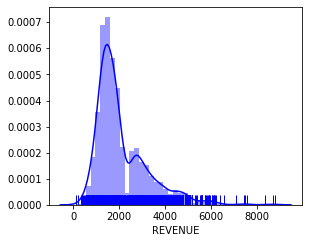

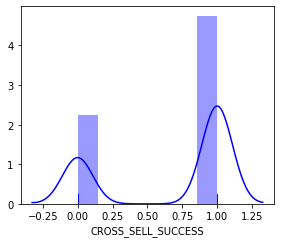

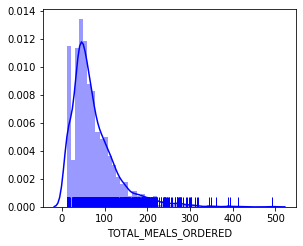

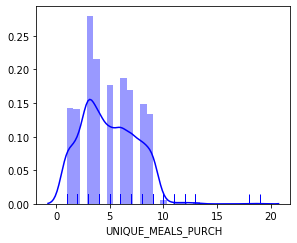

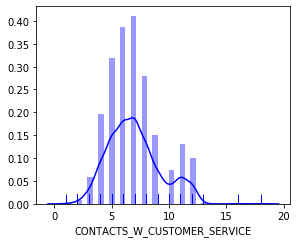

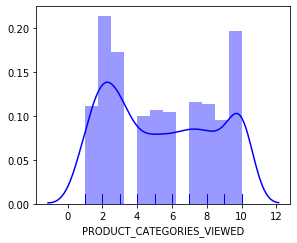

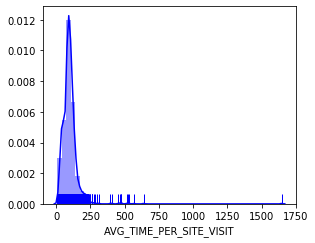

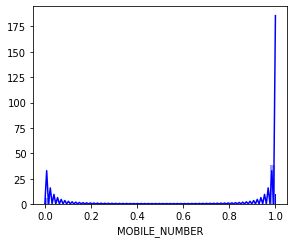

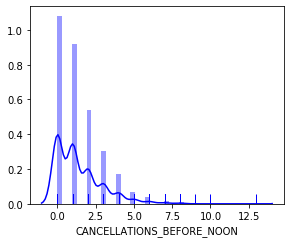

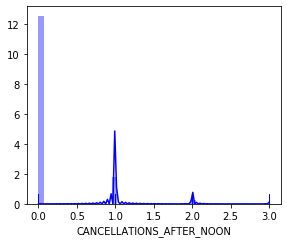

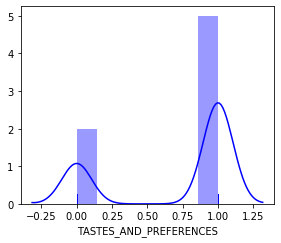

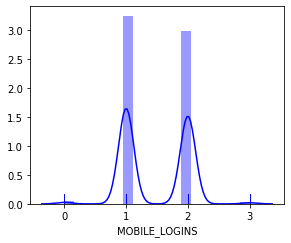

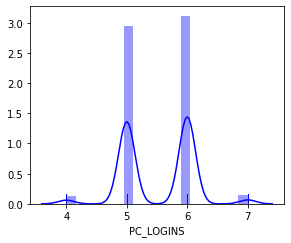

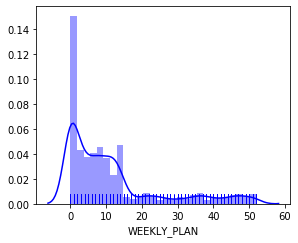

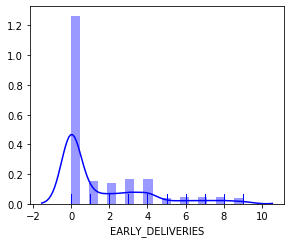

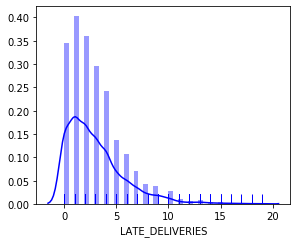

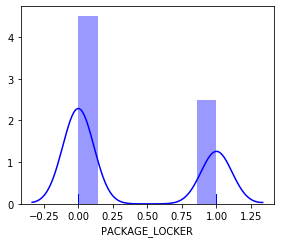

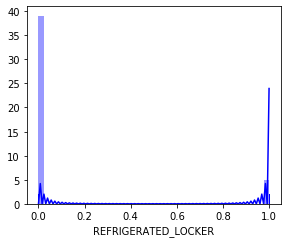

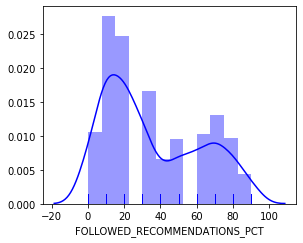

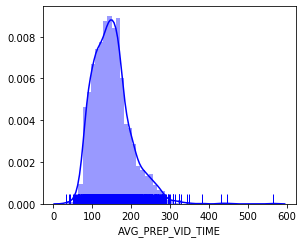

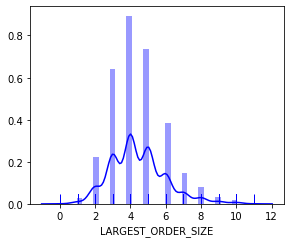

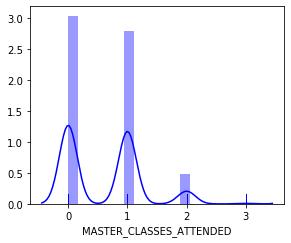

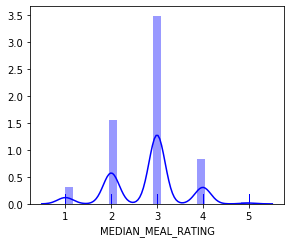

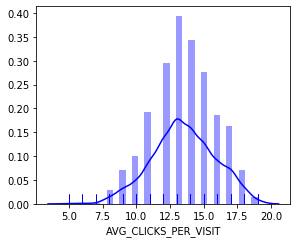

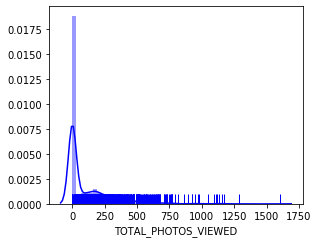

In [52]:
# Loop to create a histogram for every variable in the original_df dataset
for i in all_variables:
    fig, ax = plt.subplots(figsize = (10, 8))
    plt.subplot(2, 2, 1)
    sns.distplot(original_df[i],
                 rug = True,
                 color = 'blue')
    plt.xlabel(i)
    

The same outlier thresholds were used from the previous assignment. However, after running the initial Pearson correlation matrix as well as the Feature Importance plot (both found later on in the code), FOLLOWED_RECOMMENDATIONS_PCT was found to be most highly correlated with CROSS_SELL_SUCCESS and the most important feature. Therefore, three outlier thresholds were then set for FOLLOWED_RECOMMENDATIONS_PCT based on its histogram. To make sure all the outlier thresholds were in the same place, these additional thresholds were later added to this cell.

In [9]:
# Setting outlier thresholds based on histograms

total_meals_hi  = 180          # data starts to become skewed after this point
           
unique_meals_lo = 1.5          # no data points below this point
unique_meals_hi = 9            # there's a sharp drop at 10

contacts_cust_lo = 3           # there's a drop below 3
contacts_cust_hi = 10          # uncharacteristic increase after 10 that does not follow normal distribution

prod_viewed_lo = 1             # no data points below 1
prod_viewed_hi = 10            # no data points above 10

avg_site_time_hi = 175         # few customers spend over 175 seconds on the website

canc_before_noon_hi = 5        # data skews after 5
 
canc_after_noon_lo = 1         # very few data points below this number
canc_after_noon_hi = 2         # very few data points after this number

pc_logins_lo = 5               # very few data points below 5
pc_logins_hi = 6               # very few data points above 6

mobile_logins_lo = 1           # very few data points below 1
mobile_logins_hi = 2           # very few data points above 2

weekly_plan_hi = 14            # sharp drop after 14

early_del_hi = 4               # sharp drop after 4

late_del_hi = 7                # data skewed after this point

avg_prep_time_lo = 80          # few points below 80
avg_prep_time_hi = 230         # data skews after this point

largest_order_lo = 2           # sharp drop below this point
largest_order_hi = 7           # sharp drop after this point

master_class_hi = 1            # more than 1 class is an outlier

median_rating_lo = 2           # few points below 2
median_rating_hi = 4           # very few points after 4

avg_clicks_lo = 8              # few points below 8
avg_clicks_hi = 17.5           # few points above 17.5


revenue_lo = 500               # few values below 500
revenue_hi = 2500              # small uncharacteristic rise after this point


# Setting multiple outlier thresholds for FOLLOWED_RECOMMEMDATIONS_PCT 
#(which was found to be highly correlated to CROSS_SELL_SUCCESS)

followed_rec_1 = 30
followed_rec_2 = 60
followed_rec_3 = 80


In [10]:
##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# Developing features (columns) for outliers based on previously-defined thresholds

# Total Meals
original_df['out_total_meals'] = 0
condition_hi = original_df.loc[0:,'out_total_meals'][original_df['TOTAL_MEALS_ORDERED'] > total_meals_hi]

original_df['out_total_meals'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


# Unique Meals Purchased
original_df['out_unique_meals'] = 0
condition_hi = original_df.loc[0:,'out_unique_meals'][original_df['UNIQUE_MEALS_PURCH'] > unique_meals_hi]
condition_lo = original_df.loc[0:,'out_unique_meals'][original_df['UNIQUE_MEALS_PURCH'] < unique_meals_lo]

original_df['out_unique_meals'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_unique_meals'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# Contacts with Customer Service
original_df['out_contacts_cust'] = 0
condition_hi = original_df.loc[0:,'out_contacts_cust'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > contacts_cust_hi]
condition_lo = original_df.loc[0:,'out_contacts_cust'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] < contacts_cust_lo]

original_df['out_contacts_cust'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_contacts_cust'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# Product Categories Viewed
original_df['out_prod_viewed'] = 0
condition_hi = original_df.loc[0:,'out_prod_viewed'][original_df['PRODUCT_CATEGORIES_VIEWED'] > prod_viewed_hi]
condition_lo = original_df.loc[0:,'out_prod_viewed'][original_df['PRODUCT_CATEGORIES_VIEWED'] < prod_viewed_lo]

original_df['out_prod_viewed'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_prod_viewed'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# Average Time per Site Visit
original_df['out_avg_site_time'] = 0
condition_hi = original_df.loc[0:,'out_avg_site_time'][original_df['AVG_TIME_PER_SITE_VISIT'] > avg_site_time_hi]

original_df['out_avg_site_time'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


# Cancellations Before Noon
original_df['out_canc_before_noon'] = 0
condition_hi = original_df.loc[0:,'out_canc_before_noon'][original_df['CANCELLATIONS_BEFORE_NOON'] > canc_before_noon_hi]

original_df['out_canc_before_noon'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Cancellations After Noon
original_df['out_canc_after_noon'] = 0
condition_hi = original_df.loc[0:,'out_canc_after_noon'][original_df['CANCELLATIONS_AFTER_NOON'] > canc_after_noon_hi]
condition_lo = original_df.loc[0:,'out_canc_after_noon'][original_df['CANCELLATIONS_AFTER_NOON'] < canc_after_noon_hi]

original_df['out_canc_after_noon'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

original_df['out_canc_after_noon'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# PC Logins
original_df['out_pc_logins'] = 0
condition_hi = original_df.loc[0:,'out_pc_logins'][original_df['PC_LOGINS'] > pc_logins_hi]
condition_lo = original_df.loc[0:,'out_pc_logins'][original_df['PC_LOGINS'] < pc_logins_lo]

original_df['out_pc_logins'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_pc_logins'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# Mobile Logins
original_df['out_mobile_logins'] = 0
condition_hi = original_df.loc[0:,'out_mobile_logins'][original_df['MOBILE_LOGINS'] > mobile_logins_hi]
condition_lo = original_df.loc[0:,'out_mobile_logins'][original_df['MOBILE_LOGINS'] < mobile_logins_lo]

original_df['out_mobile_logins'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_mobile_logins'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# Weekly Plan
original_df['out_weekly_plan'] = 0
condition_hi = original_df.loc[0:,'out_weekly_plan'][original_df['WEEKLY_PLAN'] > weekly_plan_hi]

original_df['out_weekly_plan'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


# Early Deliveries
original_df['out_early_deliveries'] = 0
condition_hi = original_df.loc[0:,'out_early_deliveries'][original_df['EARLY_DELIVERIES'] > early_del_hi]

original_df['out_early_deliveries'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# Late Deliveries
original_df['out_late_deliveries'] = 0
condition_hi = original_df.loc[0:,'out_late_deliveries'][original_df['LATE_DELIVERIES'] > late_del_hi]

original_df['out_late_deliveries'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


# Average Preparation Video Time
original_df['out_avg_prep_vid_time'] = 0
condition_hi = original_df.loc[0:,'out_avg_prep_vid_time'][original_df['AVG_PREP_VID_TIME'] > avg_prep_time_hi]
condition_lo = original_df.loc[0:,'out_avg_prep_vid_time'][original_df['AVG_PREP_VID_TIME'] < avg_prep_time_lo]

original_df['out_avg_prep_vid_time'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_avg_prep_vid_time'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# Largest Order
original_df['out_largest_order'] = 0
condition_hi = original_df.loc[0:,'out_largest_order'][original_df['LARGEST_ORDER_SIZE'] > largest_order_hi]
condition_lo = original_df.loc[0:,'out_largest_order'][original_df['LARGEST_ORDER_SIZE'] < largest_order_lo]

original_df['out_largest_order'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_largest_order'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)



# Master Classes Attended
original_df['out_master_classes'] = 0
condition_hi = original_df.loc[0:,'out_master_classes'][original_df['MASTER_CLASSES_ATTENDED'] > master_class_hi]

original_df['out_master_classes'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


# Median Meal Rating
original_df['out_median_rating'] = 0
condition_hi = original_df.loc[0:,'out_median_rating'][original_df['MEDIAN_MEAL_RATING'] > median_rating_hi]
condition_lo = original_df.loc[0:,'out_median_rating'][original_df['MEDIAN_MEAL_RATING'] < median_rating_lo]

original_df['out_median_rating'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_median_rating'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# Average Clicks per Visit
original_df['out_avg_clicks'] = 0
condition_hi = original_df.loc[0:,'out_avg_clicks'][original_df['AVG_CLICKS_PER_VISIT'] > avg_clicks_hi]
condition_lo = original_df.loc[0:,'out_avg_clicks'][original_df['AVG_CLICKS_PER_VISIT'] < avg_clicks_lo]

original_df['out_avg_clicks'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_avg_clicks'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# Revenue
original_df['out_revenue'] = 0
condition_hi = original_df.loc[0:,'out_revenue'][original_df['REVENUE'] > revenue_hi]
condition_lo = original_df.loc[0:,'out_revenue'][original_df['REVENUE'] < revenue_lo]

original_df['out_revenue'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_revenue'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

#######

original_df['out_followed_rec_1'] = 0
condition_1 = original_df.loc[0:,'out_followed_rec_1'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] > followed_rec_1]

original_df['out_followed_rec_1'].replace(to_replace = condition_1,
                                    value      = 1,
                                    inplace    = True)


original_df['out_followed_rec_2'] = 0
condition_2 = original_df.loc[0:,'out_followed_rec_2'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] > followed_rec_2]


original_df['out_followed_rec_2'].replace(to_replace = condition_2,
                                    value      = 1,
                                    inplace    = True)


original_df['out_followed_rec_3'] = 0
condition_3 = original_df.loc[0:,'out_followed_rec_3'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] > followed_rec_3]

original_df['out_followed_rec_3'].replace(to_replace = condition_3,
                                    value      = 1,
                                    inplace    = True)


In [11]:
### Gender Guesser does not work here due to the nature of the names, and did not have any significance

# guessing gender based on (given) name

#import gender_guesser.detector as gender # guess gender based on (given) name


# placeholder list
#placeholder_lst = []


# looping to guess gender
#for name in original_df['FIRST_NAME']:
    #guess = gender.Detector().get_gender(name)
    #print(guess)
    #placeholder_lst.append(guess)


# converting list into a series
#original_df['gender_guess'] = pd.Series(placeholder_lst)


# checking results
#original_df.head(n = 5)

In [12]:
# Saving new excel file with gender column

#original_df.to_excel('Apprentice_Chef_Dataset_Gender.xlsx',
                 #index = False)

In [13]:
# Reading new file into Python

#original_df2 = pd.read_excel("Apprentice_Chef_Dataset_Gender.xlsx")

In [14]:
#original_df2['gender_guess'].value_counts()

In [15]:
# Looking at data dictionary to see which variables should be removed
#original_df_description = pd.read_excel("Apprentice_Chef_Data_Dictionary.xlsx")


# displaying the data dictionary
#original_df_description

<h3>Encoding Categorical Variables</h3><br>

"EMAIL" was identified to be the only categorical variable. To include this categorical variable in the model as a feature and further improve the model's accuracy, it needs to be one-hot encoded to be converted from a string into an integer. <br>

To do this, the domains will be separated from each email, and grouped according to whether the domain is junk, personal, or professional email (per specifications given by the marketing team). <br>

In [16]:
# Splitting emails

# placeholder list
placeholder_lst = []     

# looping over each email address
for index, col in original_df.iterrows():
    
    # splitting email domain at '@'
    split_email = original_df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
email_df


,0,1
0,addam.osgrey,passport.com
1,aegon.blackfyre,jnj.com
2,aegon.frey.(son.of.aenys),gmail.com
3,aegon.targaryen.(son.of.rhaegar),ibm.com
4,aegon.v.targaryen,goldmansacs.com
...,...,...
1941,yandry,yahoo.com
1942,yorkel,gmail.com
1943,young.henly,gmail.com
1944,ysilla,protonmail.com


In [17]:
# Concatenating with original DataFrame 

# Renaming column to concatenate
email_df.columns = ['name' , 'email_domain']     # Renaming columns 0 and 1 from before to "name" and "domain"


# Concatenating email_domain with original_df DataFrame
original_df = pd.concat([original_df, email_df['email_domain']],
                   axis = 1)


# Printing value counts of email_domain
original_df.loc[: ,'email_domain'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
merck.com            28
jnj.com              28
cocacola.com         28
mcdonalds.com        28
apple.com            27
nike.com             27
dupont.com           26
ge.org               26
ibm.com              26
chevron.com          25
microsoft.com        25
travelers.com        24
exxon.com            24
unitedhealth.com     24
boeing.com           23
verizon.com          22
pg.com               22
mmm.com              22
caterpillar.com      22
walmart.com          21
disney.com           21
pfizer.com           20
visa.com             20
jpmorgan.com         19
goldmansacs.com      18
unitedtech.com       18
cisco.com            18
homedepot.com        17
intel.com            17
Name: email_domain, dtype: int64

In [18]:
# Aggregating domains into higher-level categories

# Email domain types
professional_email_domains = ['@mmm.com',
                              '@amex.com',
                              '@apple.com',
                              '@boeing.com',
                              '@caterpillar.com',
                              '@chevron.com',
                              '@cisco.com',
                              '@cocacola.com',
                              '@disney.com',
                              '@dupont.com',
                              '@exxon.com',
                              '@ge.org',
                              '@goldmansacs.com',
                              '@homedepot.com',
                              '@ibm.com',
                              '@intel.com',
                              '@jnj.com',
                              '@jpmorgan.com',
                              '@mcdonalds.com',
                              '@merck.com',
                              '@microsoft.com',
                              '@nike.com',
                              '@pfizer.com',
                              '@pg.com',
                              '@travelers.com',
                              '@unitedtech.com',
                              '@unitedhealth.com',
                              '@verizon.com',
                              '@visa.com',
                              '@walmart.com']
 
            
personal_email_domains = ['@gmail.com', 
                          '@yahoo.com',
                          '@protonmail.com']


junk_email_domains  = ['@me.com',
                       '@aol.com',
                       '@hotmail.com',
                       '@live.com',
                       '@msn.com',
                       '@passport.com']


# Placeholder list
placeholder_lst = []


# Looping to group observations by domain type
for domain in original_df['email_domain']:
        if '@' + domain in professional_email_domains:
            placeholder_lst.append('professional')
    
        elif '@' + domain in personal_email_domains:
            placeholder_lst.append('personal')
            
        elif '@' + domain in junk_email_domains:
            placeholder_lst.append('junk')
            
        else:
            print('Unknown')


# Concatenating with original DataFrame
original_df['domain_group'] = pd.Series(placeholder_lst)


# Checking results
original_df['domain_group'].value_counts()

personal        861
professional    696
junk            389
Name: domain_group, dtype: int64

In [19]:
# One hot encoding emails
one_hot_domain_group = pd.get_dummies(original_df['domain_group'])

# Joining encoded variables with dataset
original_df = original_df.join([one_hot_domain_group])


In [20]:
# Dropping categorical variables after they've been encoded

original_df_dropped = original_df.drop(['NAME', 
                          'FIRST_NAME', 
                          'FAMILY_NAME',
                          'EMAIL', 
                          'email_domain', 
                          'domain_group', 
                          'CROSS_SELL_SUCCESS'],
               axis = 1)


In [21]:
# Running a loop to make inserting variables into list easier

#for val in original_df_dropped:
    #print(f"\'{val}\',")

<strong>Running Pearson Correlation Matrix</strong><br><br>
After engineering new features, a Pearson Correlation Matrix will be run again to get an overview of initial correlation of CROSS_SELL_SUCCESS to every explanatory variable.<br>

In [22]:
# Re-running Pearson correlation matrix with new features included 

df_corr = original_df.corr().round(2)

# Printing (Pearson) correlations with CROSS_SELL_SUCCESS
print(df_corr.loc['CROSS_SELL_SUCCESS'].sort_values(ascending = False))

CROSS_SELL_SUCCESS              1.00
out_followed_rec_1              0.56
FOLLOWED_RECOMMENDATIONS_PCT    0.46
out_followed_rec_2              0.35
professional                    0.19
CANCELLATIONS_BEFORE_NOON       0.16
out_followed_rec_3              0.13
MOBILE_NUMBER                   0.10
TASTES_AND_PREFERENCES          0.08
REFRIGERATED_LOCKER             0.07
out_canc_after_noon             0.07
out_canc_before_noon            0.06
CONTACTS_W_CUSTOMER_SERVICE     0.04
personal                        0.04
MASTER_CLASSES_ATTENDED         0.04
PC_LOGINS                       0.04
PACKAGE_LOCKER                  0.04
AVG_PREP_VID_TIME               0.03
MEDIAN_MEAL_RATING              0.03
EARLY_DELIVERIES                0.02
out_late_deliveries             0.02
m_FAMILY_NAME                   0.02
LARGEST_ORDER_SIZE              0.02
out_early_deliveries            0.02
LATE_DELIVERIES                 0.01
AVG_TIME_PER_SITE_VISIT         0.01
TOTAL_MEALS_ORDERED             0.01
T

<h3>Candidate Modelling</h3><br>
<strong>Preparing Model Variables</strong>

Here, different variables will be assigned to different model objects, depending on different decision plots and factors. The different sets of variables will be run and their scores will be compared to see which set of variables yields the best scores.

In [23]:
# Base model with all explanatory variables, including engineered features
model_1 = ['REVENUE',
           'TOTAL_MEALS_ORDERED',
           'UNIQUE_MEALS_PURCH',
           'CONTACTS_W_CUSTOMER_SERVICE',
           'PRODUCT_CATEGORIES_VIEWED',
           'AVG_TIME_PER_SITE_VISIT',
           'MOBILE_NUMBER',
           'CANCELLATIONS_BEFORE_NOON',
           'CANCELLATIONS_AFTER_NOON',
           'TASTES_AND_PREFERENCES',
           'PC_LOGINS',
           'MOBILE_LOGINS',
           'WEEKLY_PLAN',
           'EARLY_DELIVERIES',
           'LATE_DELIVERIES',
           'PACKAGE_LOCKER',
           'REFRIGERATED_LOCKER',
           'FOLLOWED_RECOMMENDATIONS_PCT',
           'AVG_PREP_VID_TIME',
           'LARGEST_ORDER_SIZE',
           'MASTER_CLASSES_ATTENDED',
           'MEDIAN_MEAL_RATING',
           'AVG_CLICKS_PER_VISIT',
           'TOTAL_PHOTOS_VIEWED',
           'm_FAMILY_NAME',
           'out_followed_rec_1',
           'out_followed_rec_2',
           'out_followed_rec_3',
           'out_total_meals',
           'out_unique_meals',
           'out_contacts_cust',
           'out_prod_viewed',
           'out_avg_site_time',
           'out_canc_before_noon',
           'out_canc_after_noon',
           'out_pc_logins',
           'out_mobile_logins',
           'out_weekly_plan',
           'out_early_deliveries',
           'out_late_deliveries',
           'out_avg_prep_vid_time',
           'out_largest_order',
           'out_master_classes',
           'out_median_rating',
           'out_avg_clicks',
           'out_revenue',
           'personal',
           'professional']


# Model variables identified based on feature importance plot
model_2 = ['out_followed_rec_1',
           'professional',
           'personal',
           'CANCELLATIONS_BEFORE_NOON',
           'FOLLOWED_RECOMMENDATIONS_PCT',
           'MOBILE_NUMBER']


# Model variables identified based on Pearson correlation
model_3 = ['out_followed_rec_1',
           'FOLLOWED_RECOMMENDATIONS_PCT',
           'out_followed_rec_2',
           'professional',
           'CANCELLATIONS_BEFORE_NOON',
           'junk',
           'MOBILE_NUMBER']


# Model variables identified based on logistic regression (p-value less than 0.05)
model_4 = ['MOBILE_NUMBER',
           'CANCELLATIONS_BEFORE_NOON',
           'CANCELLATIONS_AFTER_NOON',
           'TASTES_AND_PREFERENCES',
           'PC_LOGINS',
           'MOBILE_LOGINS',
           'REFRIGERATED_LOCKER',
           'FOLLOWED_RECOMMENDATIONS_PCT',
           'm_FAMILY_NAME',
           'personal',
           'professional']


After running all the different model objects (sets of variables), <strong>model_4</strong> was found to yield the best model performance. So, this set of explanatory variables will be used for the models.

<h3>Scaling Data</h3><br>

Here, the explanatory variables will be standardized so that each feature's variance is measured on the same scale. This is required for KNN and Gradient Boosted Classifications, but the standardized data will be used for all models.

In [24]:
# Assigning only explanatory variables to a new dataframe for scaling

original_df_dropped_df = original_df_dropped.loc[ : , model_4]

### Scaling data


# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with original_df data with all the strings and categorical variables dropped
# Only want to standardize the X side, because we only have one y variable so the variance would be all the same
scaler.fit(original_df_dropped_df)   


# TRANSFORMING our data after fit
X_scaled = scaler.transform(original_df_dropped_df)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


# Renaming scaled data columns from numbers to original names
X_scaled_df.columns = original_df_dropped_df.columns


# checking the results
X_scaled_df.describe().round(2)



,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,m_FAMILY_NAME,personal,professional
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.68,-0.91,-0.38,-1.58,-2.61,-2.80,-0.36,-1.33,-0.16,-0.89,-0.75
25%,0.37,-0.91,-0.38,-1.58,-0.89,-0.90,-0.36,-0.96,-0.16,-0.89,-0.75
50%,0.37,-0.26,-0.38,0.63,0.83,-0.90,-0.36,-0.20,-0.16,-0.89,-0.75
75%,0.37,0.38,-0.38,0.63,0.83,0.99,-0.36,0.93,-0.16,1.12,1.34
max,0.37,7.48,6.56,0.63,2.56,2.89,2.80,2.05,6.36,1.12,1.34


<h3>Building a Train-Test Split</h3><br>


A train-test split will be defined, where 75% of the data will be used to train the model, and the other 25% of the data will be used to test it. This split is done so that the model does not overfit - i.e. adhere too closely to existing data - and ensure that it predicts accurately on new observations. As previously mentioned, the split will be done on the scaled explanatory variables.

In [25]:
## Train-test split

# Explanatory variable data
original_df_explanatory = X_scaled_df


# Response variable data
original_df_target = original_df.loc[:, 'CROSS_SELL_SUCCESS']


# Preparing training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
                                   original_df_explanatory,
                                   original_df_target,
                                   test_size = 0.25,
                                   random_state = 222,
                                   stratify = original_df_target)


<h3>Running Models</h3><br>

With the features engineered into the original original_df dataset, the models are now ready to be run.<br>

After building the train-test split, six different models will be run and tested to compare the scores of each one and see which one results in the highest AUC score, while still having a training and testing score within 0.05 of one another to ensure the model is not overfitting. <br>
<br>
The AUC score will be focused on to evaluate the classification models, as it takes into account sensitivity and specificity, i.e. false-positive and false-negative rates in the Confusion Matrix, to measure performance. Here, I will be using the ROC AUC.
<br><br>
After running each model, results of its Training Accuracy, Testing Accuracy, and AUC scores will be saved and stored in a list called <strong>model_performance</strong>, so that they can all be compared.

<h4>CART Model</h4><br>

First, a classification tree will be created to see which features are important to the model. To avoid overfitting to the training data, the tree will be pruned, in that its growth will be limited. To do this, the maximum amount of nodes will be specified, as well as the minimum samples per leaf (the amount of samples to be leftover after splitting).

In [26]:
# CART MODEL

# Constructing a full tree to help with variable selection

# INSTANTIATING a classification tree object
tree = DecisionTreeClassifier(max_depth = 7,           # restricting growth of tree
                              min_samples_leaf = 15,    # specifying amount of samples to be leftover after split
                              min_samples_split = 100,
                              splitter = 'random',
                              random_state = 222)


# FITTING the training data
tree_fit = tree.fit(X_train, y_train)


# PREDICTING on new data
tree_pred = tree_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', tree_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(4))


Training ACCURACY: 0.8095
Testing  ACCURACY: 0.7864
AUC Score        : 0.77


<strong>Saving CART Model Results</strong>

In [27]:
# creating an empty list
model_performance = [['Model', 'Training Accuracy',
                      'Testing Accuracy', 'AUC Value']]

# train accuracy
tree_train_acc = tree_fit.score(X_train, y_train).round(4)


# test accuracy
tree_test_acc  = tree_fit.score(X_test, y_test).round(4)


# auc value
tree_auc       = roc_auc_score(y_true  = y_test,
                               y_score = tree_pred).round(4)


# saving the results
model_performance.append(['Pruned Tree',
                          tree_train_acc,
                          tree_test_acc,
                          tree_auc])


# checking the results
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Pruned Tree', 0.8095, 0.7864, 0.77]


<strong>Feature Importance Plot</strong><br><br>
Here, the feature importances will be plotted on the scaled explanatory data in model_1, which is the base model that includes all explanatory variables including engineered features. From the plot, the most important features will be identified and put into another model object to be run separately.
<br><br>
Since this plot was only used to look at which features were important for further analysis, it was commented out as it was no longer needed after that.

In [28]:
# Calling feature importance function

#plot_feature_importances(tree_fit, 
                         #train = X_train, 
                         #export = False)

<strong>Output:</strong>
According to the feature importance plot, FOLLOWED_RECOMMEMDATIONS_PCT, CANCELLATIONS_BEFORE_NOON, professional, personal, and MOBILE_NUMBER are the most important features in the CART model.
<br><br>
Upon looking at the previously-plotted histograms that were used to set outlier thresholds, it was found that no thresholds were previously set for the FOLLOWED_RECOMMEMDATIONS_PCT variable. Since it was found to be an important feature, outlier thresholds was then set and placed with the other outlier thresholds in the respective section, for organization purposes.
<br>
***
After running these new outlier thresholds, the feature importance plot was ran again, and out_followed_rec_1 (the first outlier threshold for FOLLOWED_RECOMMEMDATIONS_PCT) was found to be the most important feature in the model, followed by professional, personal, CANCELLATIONS_BEFORE_NOON, FOLLOWED_RECOMMEMDATIONS_PCT, and MOBILE_NUMBER. These explanatory variables were then put in candidate model <strong>model_2</strong>, to be run separately.
***

<h4>Logistic Regression</h4><br>

With the logistic regression, all the explanatory variables were correlated against the response variable, CROSS_SELL_SUCCESS. Then, insignificant variables were removed one-by-one according to p-values, until all p-values in the model were below 0.05. These remaining explanatory variables were then put in the candidate model <strong>model_3</strong> to be run again later on.
<br>

In [29]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """CROSS_SELL_SUCCESS ~
                                          MOBILE_NUMBER +
                                          CANCELLATIONS_BEFORE_NOON +
                                          CANCELLATIONS_AFTER_NOON +
                                          TASTES_AND_PREFERENCES +
                                          PC_LOGINS +
                                          MOBILE_LOGINS +
                                          REFRIGERATED_LOCKER +
                                          FOLLOWED_RECOMMENDATIONS_PCT +
                                          m_FAMILY_NAME +
                                          personal +
                                          professional
                                       """,
                           data = original_df)



# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary()

Optimization terminated successfully.
         Current function value: 0.436523
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1946
Model:                          Logit   Df Residuals:                     1934
Method:                           MLE   Df Model:                           11
Date:                Sun, 15 Mar 2020   Pseudo R-squ.:                  0.3046
Time:                        19:05:29   Log-Likelihood:                -849.47
converged:                       True   LL-Null:                       -1221.6
Covariance Type:            nonrobust   LLR p-value:                1.746e-152
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -4.2495      0.652     -6.518      0.000      -5.527      -2.972
MOBILE_NUMBER                    0.7649      0.176      4.335      0.000       0.419       1.111
CANCELLATIONS_BEFORE_NOON        0.2533      0.043      5.826      0.000       0.168       0.339
CANCELLATIONS_AFTER_NOON        -0.2679      0.133     -2.009      0.045      -0.529      -0.007
TASTES_AND_PREFERENCES           0.4459      0.131      3.401      0.001       0.189       0.703
PC_LOGINS                        0.2378      0.104      2.295      0.022       0.035       0.441
MOBILE_LOGINS                   -0.2646      0.114     -2.330      0.020      -0.487      -0.042
REFRIGERATED_LOCKER              0.4721      0.202      2.332      0.020       0.075       0.869
FOLLOWED_RECOMMENDATIONS_PCT     0.0573      0.003     16.628      0.000       0.051       0.064
m_FAMILY_NAME                    0.9335      0.386      2.419      0.016       0.177       1.690
personal                         1.2398      0.153      8.089      0.000       0.939       1.540
professional                     1.8917      0.168     11.266      0.000       1.563       2.221
================================================================================================
"""

In [30]:
### LOGISTIC REGRESSION

# INSTANTIATING a logistic regression model
logreg = sklearn.linear_model.LogisticRegression(solver   = 'lbfgs',
                                                 C        = 1,        # regulation of model; can tune to make model less overfit
                                                 max_iter = 1000,
                                                 random_state = 222)


# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))
print('AUC Score:',         roc_auc_score(y_true  = y_test,
                                          y_score = logreg_pred).round(4))



Training ACCURACY: 0.7656
Testing  ACCURACY: 0.7474
AUC Score: 0.7125


<strong>Saving Logistic Regression Model Results</strong>

In [31]:
# Saving scores to objects, then saving results

# train accuracy
logreg_train_acc  = logreg_fit.score(X_train, y_train).round(4)


# test accuracy
logreg_test_acc   = logreg_fit.score(X_test, y_test).round(4)


# auc value
logreg_auc = roc_auc_score(y_true  = y_test,
                           y_score = logreg_pred).round(4)


# saving the results
model_performance.append(['Logistic Regression',
                          logreg_train_acc,
                          logreg_test_acc,
                          logreg_auc])

<h4>KNN Classification Model</h4><br>

Since the explanatory variables were already scaled, distance has been standardized, so we can just run the KNN Classification model using the original_df_explanatory data frame.<br><br>

First, the optimal number of neighbours for KNN will be determined using a previously-run user-defined function, optimal_neighbors. 

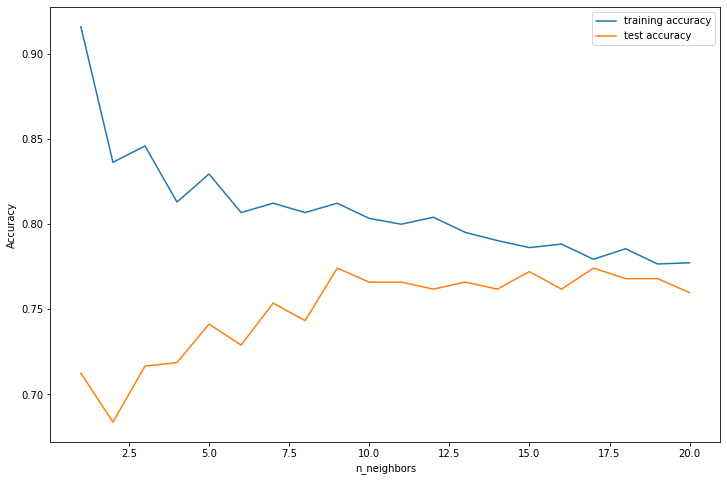

The optimal number of neighbors is: 9


In [32]:
# determining the optimal number of neighbors for KNN
opt_neighbors = optimal_neighbors(X_data = original_df_explanatory, 
                                  y_data = original_df_target,
                                  response_type = 'class')

Using the function output's optimal number of neighbors, 9, the KNN classification model will now be run.

In [33]:
# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)

# FITTING the training data
knn_fit = knn_opt.fit(X_train, y_train)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', knn_opt.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', knn_opt.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))

Training ACCURACY: 0.8088
Testing  ACCURACY: 0.7556
AUC Score        : 0.7152


<strong>Saving KNN Classification Model Results</strong>

In [34]:
# Saving KNN performance

# train accuracy
knn_train_acc = knn_fit.score(X_train, y_train).round(4)


# test accuracy
knn_test_acc  = knn_fit.score(X_test, y_test).round(4)


# auc value
knn_auc       = roc_auc_score(y_true  = y_test,
                              y_score = knn_pred).round(4)


# saving the results
model_performance.append(['KNN Classification',
                          knn_train_acc,
                          knn_test_acc,
                          knn_auc])


<h4>Random Forest</h4><br>

In [35]:
# Instantiating model object
rf_model = RandomForestClassifier()

# Fitting the training data
rf_model.fit(X_train, y_train)

# Predicting on new data

rf_model_pred = rf_model.predict(X_test)


#Printing scores

print('Training Score:', rf_model.score(X_train, y_train).round(3))
print('Testing Score:',  rf_model.score(X_test, y_test).round(3))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_model_pred).round(4))

# saving scoring data for future use
rf_train_score = rf_model.score(X_train, y_train).round(3)
rf_test_score  = rf_model.score(X_test, y_test).round(3)


Training Score: 0.923
Testing Score: 0.758
AUC Score        : 0.7336


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<strong>Saving Random Forest Results</strong>

In [36]:
#Saving results

# train accuracy
rf_train_acc  = rf_model.score(X_train, y_train).round(3)


# test accuracy
rf_test_acc   = rf_model.score(X_test, y_test).round(3)


# auc value
rf_auc = roc_auc_score(y_true  = y_test,
                       y_score = rf_model_pred).round(4)


# saving the results
model_performance.append(['Random Forest',
                          rf_train_acc,
                          rf_test_acc,
                          rf_auc])

<h4>Gradient Boosting Classification Model</h4><br>

Since this model uses penalty terms, which is based on distance, it needs standardized data. Again, since the explanatory variables were already scaled, distance has been standardized, so we can just run the Gradient Boosting Classification model using the original_df_explanatory data frame.
<br><br>
The Gradient Boosting Classification Model is similar to Random Forest, but instead of using randomness, it learns from the previous decision tree; where variance was high, it made this variable less critical in the next tree. Therefore, the score is expected to be better in this model than in the Random Forest model.

In [37]:
# INSTANTIATING the model object without hyperparameters
gbc_model = GradientBoostingClassifier(random_state = 222)


# FITTING the training data
gbc_model.fit(X_train, y_train)

# PREDICTING on new data
gbc_pred = gbc_model.predict(X_test)

#Printing scores
print('Training Score:', gbc_model.score(X_train, y_train).round(3))
print('Testing Score:',  gbc_model.score(X_test, y_test).round(3))
print('AUC Score:',      roc_auc_score(y_true  = y_test,
                                       y_score = gbc_pred).round(4))
# saving scoring data for future use
gbc_train_score = gbc_model.score(X_train, y_train).round(3)
gbc_test_score  = gbc_model.score(X_test, y_test).round(3)

Training Score: 0.832
Testing Score: 0.805
AUC Score: 0.787


<strong>Saving Gradient Boosting Classification Results</strong>

In [38]:
#Saving results

# train accuracy
gbc_train_acc  = gbc_model.score(X_train, y_train).round(3)


# test accuracy
gbc_test_acc   = gbc_model.score(X_test, y_test).round(3)


# auc value
gbc_auc = roc_auc_score(y_true  = y_test,
                        y_score = gbc_pred).round(4)


# saving the results
model_performance.append(['Gradient Boosting Classification',
                          gbc_train_acc,
                          gbc_test_acc,
                          gbc_auc])

<h4>Gaussian Naive Bayes Model</h4><br>

The <a href="https://scikit-learn.org/stable/modules/naive_bayes.html"> Gaussian Naive Bayes (NB) model</a> is a predictive model that works on the assumption that features are independent, and that continuous variables follow a normal distribution.


In [39]:
# INSTANTIATING the model object without hyperparameters
gaus_model = GaussianNB()


# FITTING the training data
gaus_model.fit(X_train, y_train)

# PREDICTING on new data
gaus_pred = gaus_model.predict(X_test)

#Printing scores
print('Training Score:', gaus_model.score(X_train, y_train).round(3))
print('Testing Score:',  gaus_model.score(X_test, y_test).round(3))
print('AUC Score:',      roc_auc_score(y_true  = y_test,
                                       y_score = gaus_pred).round(4))
# saving scoring data for future use
gaus_train_score = gaus_model.score(X_train, y_train).round(3)
gaus_test_score  = gaus_model.score(X_test, y_test).round(3)


Training Score: 0.768
Testing Score: 0.807
AUC Score: 0.8038


<strong>Saving GaussianNB Results</strong>

In [40]:
#Saving results

# train accuracy
gaus_train_acc  = gaus_model.score(X_train, y_train).round(3)


# test accuracy
gaus_test_acc   = gaus_model.score(X_test, y_test).round(3)


# auc value
gaus_auc = roc_auc_score(y_true  = y_test,
                        y_score = gaus_pred).round(4)


# saving the results
model_performance.append(['Gaussian Naive Bayes Model',
                          gaus_train_acc,
                          gaus_test_acc,
                          gaus_auc])

<h4>Comparing Performance of All Models</h4><br>
The training, testing, and AUC scores of all the models were stored in <strong>model_performance</strong>. Here, they will be compared to see which model yields the best AUC score, and hyperparameter tuning will only be done on the best-performing model for efficiency.

In [41]:
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Pruned Tree', 0.8095, 0.7864, 0.77]
['Logistic Regression', 0.7656, 0.7474, 0.7125]
['KNN Classification', 0.8088, 0.7556, 0.7152]
['Random Forest', 0.923, 0.758, 0.7336]
['Gradient Boosting Classification', 0.832, 0.805, 0.787]
['Gaussian Naive Bayes Model', 0.768, 0.807, 0.8038]


<strong>Output:</strong><br><br>
Upon comparing the performance of all the models, the Gaussian NB model yields the best AUC score of 0.8038, where the training and testing scores are also within 0.05 of one another (indicating that it is not overfit). Therefore, it was chosen as the final model.

<h3>Hyperparameter Tuning with GridSearchCV</h3>

Hyperparameter tuning will now be performed to find the optimal arguments, or parameters, for a model. This will be done with GridSearchCV, which exhaustively searches over combinations of specified parameter values. Since GridSearchCV's method is very time-consuming, hyperparameter tuning will only be performed on the best model, which is GaussianNB in this case.<br><br>
For the GaussianNB hyperparameter code template, a <a href="https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-3-cross-validation-and-hyperparameter-tuning/"><i>Feature Ranking</i> tutorial</a> was used. For cross-validation (cv), the <strong>RepeatedStratifiedKFold</strong> function was used, which splits the dataset into K subsets ('folds'). Using the K-1 folds, the model is trained and then it is tested against the remaining fold; this is repeated K times, with a different fold being used for testing each time. To ensure the proportion of the training and test sets are equal to the proportion in the full dataset in each cross-validation, stratification is used.

In [42]:
#### Gaussian NB model was chosen instead of Gradient Boosting #####

####################################################################

#### Hyperparameter tuning for Gradient Boosting Classification

# declaring a hyperparameter space
#learn_space     = pd.np.arange(0.1, 1.6, 0.3)
#estimator_space = pd.np.arange(50, 250, 50)
#depth_space     = pd.np.arange(1, 10)


# creating a hyperparameter grid
#param_grid = {'learning_rate' : learn_space,
              #'max_depth'     : depth_space,
              #'n_estimators'  : estimator_space}


# INSTANTIATING the model object without hyperparameters
#full_gbm_grid = GradientBoostingClassifier(random_state = 222)


# GridSearchCV object
#full_gbm_cv = GridSearchCV(estimator  = full_gbm_grid,
                           #param_grid = param_grid,
                           #cv         = 3,
                           #scoring    = make_scorer(roc_auc_score,
                                        #needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
#full_gbm_cv.fit(original_df_explanatory, original_df_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", full_gbm_cv.best_params_)
#print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))


##########
# RESULTS
##########

#Tuned Parameters : {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 50} Tuned Training AUC: 0.6396

In [43]:
#### Gaussian NB model was chosen instead of Gradient Boosting #####

####################################################################

# INSTANTIATING the model object with optimal hyperparameters
#gbc_model_tuned = GradientBoostingClassifier(learning_rate = 0.1,
                                             #max_depth     = 2,
                                             #n_estimators  = 50,
                                             #random_state  = 222)


# FITTING the training data
#gbc_model_tuned.fit(X_train, y_train)

# PREDICTING on new data
#gbc_pred_tuned = gbc_model_tuned.predict(X_test)

#Printing scores
#print('Training Score:', gbc_model_tuned.score(X_train, y_train).round(3))
#print('Testing Score:',  gbc_model_tuned.score(X_test, y_test).round(3))
#print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          #y_score = gbc_pred_tuned).round(4))
# saving scoring data for future use
#gbc_tuned_train_score = gbc_model_tuned.score(X_train, y_train).round(3)
#gbc_tuned_test_score  = gbc_model_tuned.score(X_test, y_test).round(3)

In [44]:
#### Hyperparameter tuning for Gaussian NB

#from sklearn.preprocessing   import PowerTransformer
#from sklearn.model_selection import RepeatedKFold
#from sklearn.model_selection import RepeatedStratifiedKFold

#np.random.seed(222)

#creating a hyperparameter grid
#param_grid = {'var_smoothing': np.logspace(0,-9, num = 100)}


#INSTANTIATING the model object without hyperparameters
#gaus_model = GaussianNB()


# defining method for cross-validation
#cv_method = RepeatedStratifiedKFold(n_splits     = 5, 
                                    #n_repeats    = 3, 
                                    #random_state = 222)

# GridSearchCV object
#gaus_cv = GridSearchCV(estimator  = gaus_model, 
                       #param_grid = param_grid, 
                       #cv         = cv_method,
                       #verbose    = 1, 
                       #scoring    = make_scorer(roc_auc_score,
                                    #needs_threshold = False))

# Transforming data
#original_df_transformed = PowerTransformer().fit_transform(original_df_explanatory)


# FITTING to the FULL DATASET (due to cross-validation)
#gaus_cv.fit(original_df_explanatory, original_df_target);


# PREDICT step is not needed


# printing the optimal parameters and best score
#print("Tuned Parameters  :", gaus_cv.best_params_)
#print("Tuned Training AUC:", gaus_cv.best_score_.round(4))

Saving results of hyperparameter tuning:

Tuned Parameters  : {'var_smoothing': 0.003511191734215131}
Tuned Training AUC: 0.7636

<h3>Final Model: Gaussian NB</h3>

The Gaussian NB model will now be run again with the optimal hyperparameters.

In [45]:
# INSTANTIATING the model object with optimal hyperparameters
gaus_model_tuned = GaussianNB(var_smoothing = 0.003511191734215131)


# FITTING the training data
gaus_model_tuned.fit(X_train, y_train)


# PREDICTING on new data
gaus_pred_tuned = gaus_model_tuned.predict(X_test)

#Printing scores
print('Training Score:', gaus_model_tuned.score(X_train, y_train).round(3))
print('Testing Score:',  gaus_model_tuned.score(X_test, y_test).round(3))
print('AUC Score:',      roc_auc_score(y_true  = y_test,
                                       y_score = gaus_pred_tuned).round(4))
# saving scoring data for future use
gaus_train_score_tuned = gaus_model_tuned.score(X_train, y_train).round(3)
gaus_test_score_tuned  = gaus_model_tuned.score(X_test, y_test).round(3)

Training Score: 0.768
Testing Score: 0.805
AUC Score: 0.8023


<strong>Saving Tuned GaussianNB Results</strong>

In [46]:
#Saving results

# train accuracy
gaus_train_acc_tuned  = gaus_model_tuned.score(X_train, y_train).round(3)


# test accuracy
gaus_test_acc_tuned   = gaus_model_tuned.score(X_test, y_test).round(3)


# auc value
gaus_auc_tuned = roc_auc_score(y_true  = y_test,
                               y_score = gaus_pred_tuned).round(4)


# saving the results
model_performance.append(['TUNED Gaussian Naive Bayes Model',
                          gaus_train_acc_tuned,
                          gaus_test_acc_tuned,
                          gaus_auc_tuned])

<strong>Final Model Comparison</strong>

In [47]:
for model in model_performance:
    print(model)

['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']
['Pruned Tree', 0.8095, 0.7864, 0.77]
['Logistic Regression', 0.7656, 0.7474, 0.7125]
['KNN Classification', 0.8088, 0.7556, 0.7152]
['Random Forest', 0.923, 0.758, 0.7336]
['Gradient Boosting Classification', 0.832, 0.805, 0.787]
['Gaussian Naive Bayes Model', 0.768, 0.807, 0.8038]
['TUNED Gaussian Naive Bayes Model', 0.768, 0.805, 0.8023]


From the final comparison, it appears as though hyperparameter tuning didn't really make a difference in the score of the GaussianNB model. In fact, it looks like the scores ever-so-slightly decreased.

<h3>Confusion Matrix</h3>
<br>
Here, a confusion matrix will be shown to measure the final model performance and the quality of predictions based on the amount of its true-negatives (it correctly predicted negative), false-negatives (it incorrectly predicted negative), false-positives (it incorrectly predicted positive), and true-positives (it correctly predicted positive).<br><br>

The following confusion matrix can be read as follows:<br><br>

~~~
                   |
  True Negatives   |  False Positives
  (correct)        |  (incorrect)
                   |
-------------------|------------------
                   |
  False Negatives  |  True Positives
  (incorrect)      |  (correct)
                   |
  
~~~

<br><br>
So, in terms of this model:<br><br>

~~~

                                                        |
  PREDICTED: WILL NOT SUBSCRIBE                         |    PREDICTED: WILL SUBSCRIBE 
           (CROSS_SELL_SUCCESS = 0)                     |              (CROSS_SELL_SUCCESS = 1)
                                                        |
  ACTUAL:    DID NOT SUBSCRIBE                          |    ACTUAL:    DID NOT SUBSCRIBE   
           (CROSS_SELL_SUCCESS = 0)                     |              (CROSS_SELL_SUCCESS = 0)
                                                        |
--------------------------------------------------------|------------------------------------------------------
                                                        |
  PREDICTED: WILL NOT SUBSCRIBE                         |    PREDICTED: WILL SUBSCRIBE
           (CROSS_SELL_SUCCESS = 0)                     |              (CROSS_SELL_SUCCESS = 1)
                                                        |             
  ACTUAL:    SUBSCRIBED                                 |    ACTUAL:    SUBSCRIBED 
           (CROSS_SELL_SUCCESS = 1)                     |              (CROSS_SELL_SUCCESS = 1)
                                                        |

~~~

In [48]:
print(confusion_matrix(y_true = y_test,
                       y_pred = gaus_pred))

[[124  32]
 [ 62 269]]


<strong>Visualized Confusion Matrix</strong>

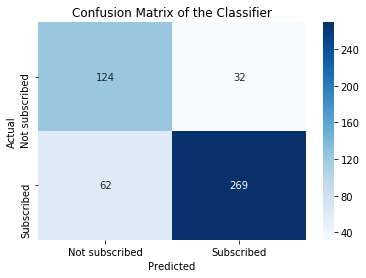

In [49]:
visual_cm(true_y = y_test,
          pred_y = gaus_pred,
          labels = ['Not subscribed', 'Subscribed'])

<strong>Output:</strong><br>
According to the confusion matrix, most of the model's predictions fall into the true-positives and true-negatives quadrants, signifying that it is making correct predictions and performing well. In other words, the model correctly predicted that 269 customers will subscribe to <i>Halfway There</i> (the cross-selling promotion was successful), and correctly predicted that 124 customers would not subscribe. <br><br>
For the incorrect predictions, which are the top right and bottom left quadrants, the model predicted that 62 people would not subscribe, but in fact they did, and it predicted that 32 people would subscribe, but they did not.

In [59]:
original_df.to_excel("EMAILS.xlsx")